In [1]:
import numpy as np
import matplotlib.pyplot as plt

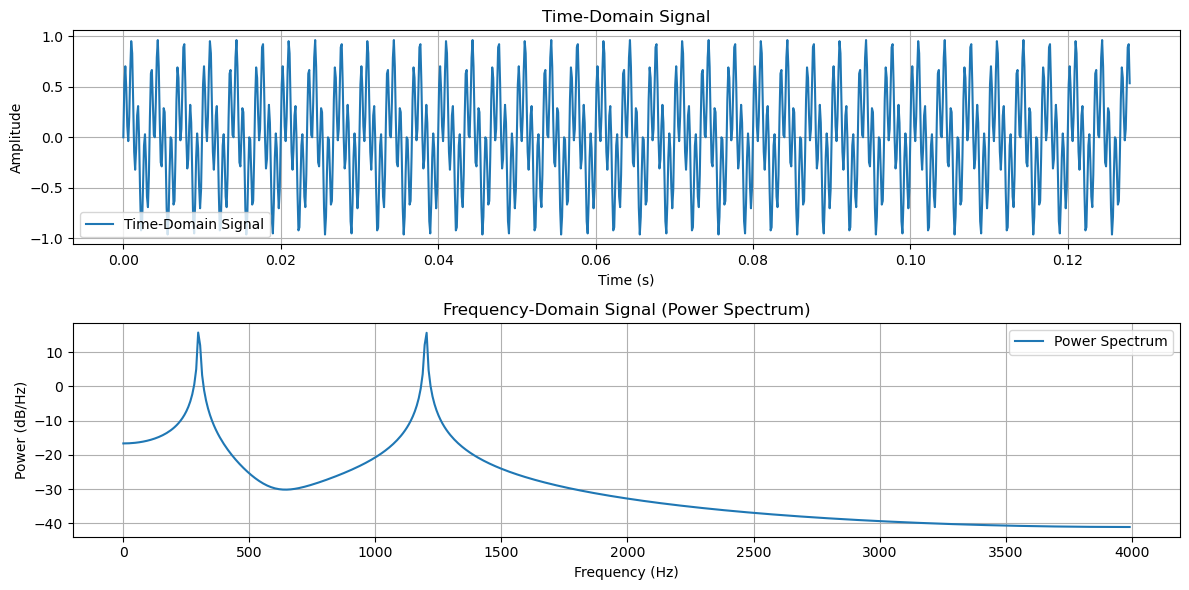

In [2]:
# Parameters
fsample = 8000  # Sampling frequency in Hz
N = 1024        # Number of samples

# Generate a time-domain signal: a sum of two sinusoids
t = np.arange(N) / fsample
frequency1 = 300  # Frequency of the first sine wave in Hz
frequency2 = 1200 # Frequency of the second sine wave in Hz
x = 0.5 * np.sin(2 * np.pi * frequency1 * t) + 0.5 * np.sin(2 * np.pi * frequency2 * t)

# Compute the DFT of the signal
X = np.fft.fft(x)
frequencies = np.fft.fftfreq(N, d=1/fsample)

# Compute the Power Spectrum
power_spectrum = (np.abs(X) ** 2) / N

# Plotting the time-domain signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x, label='Time-Domain Signal')
plt.title('Time-Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plotting the frequency-domain signal (Power Spectrum)
plt.subplot(2, 1, 2)
plt.plot(frequencies[:N//2], 10 * np.log10(power_spectrum[:N//2]), label='Power Spectrum')
plt.title('Frequency-Domain Signal (Power Spectrum)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB/Hz)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

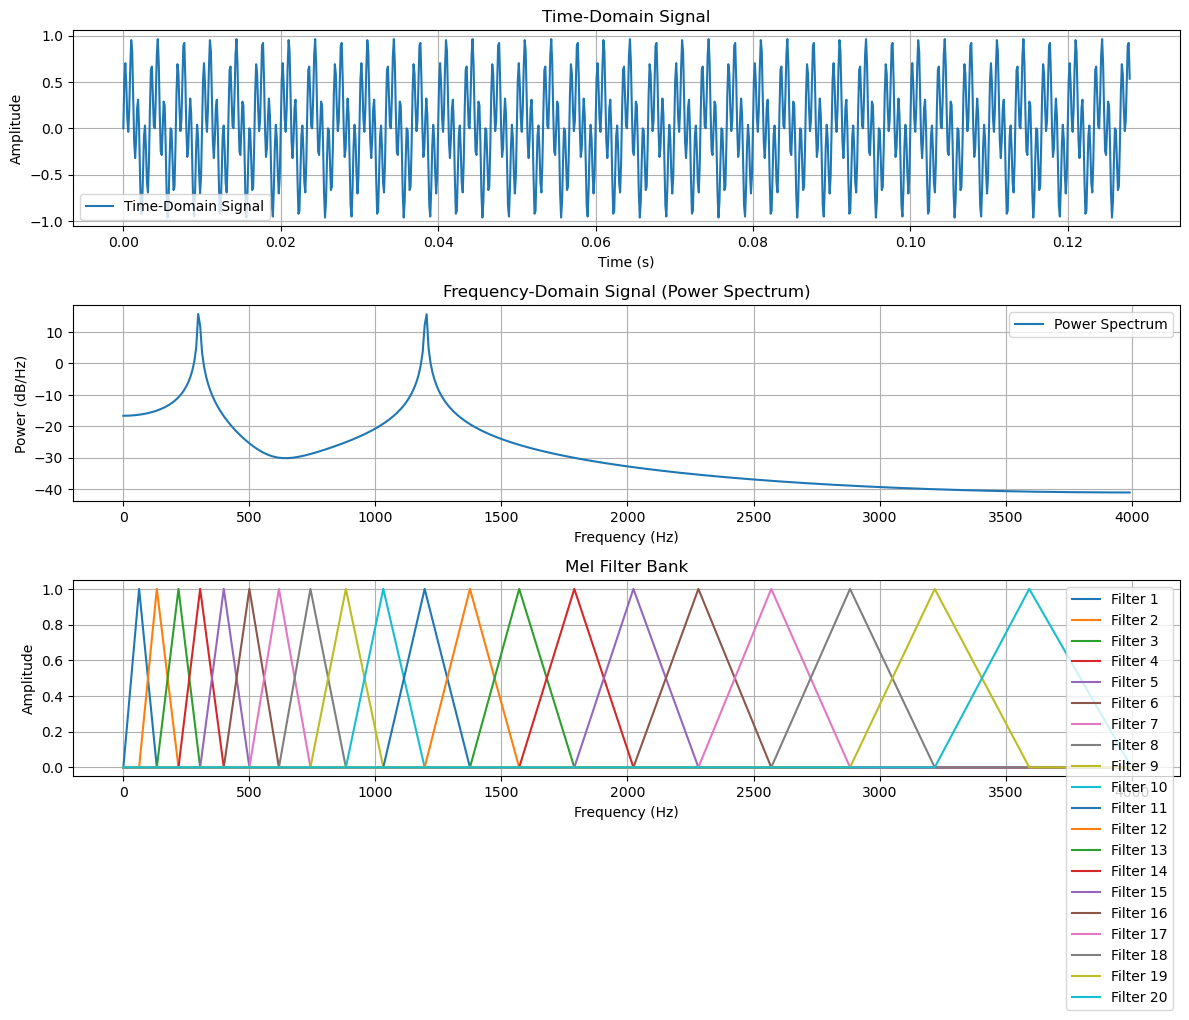

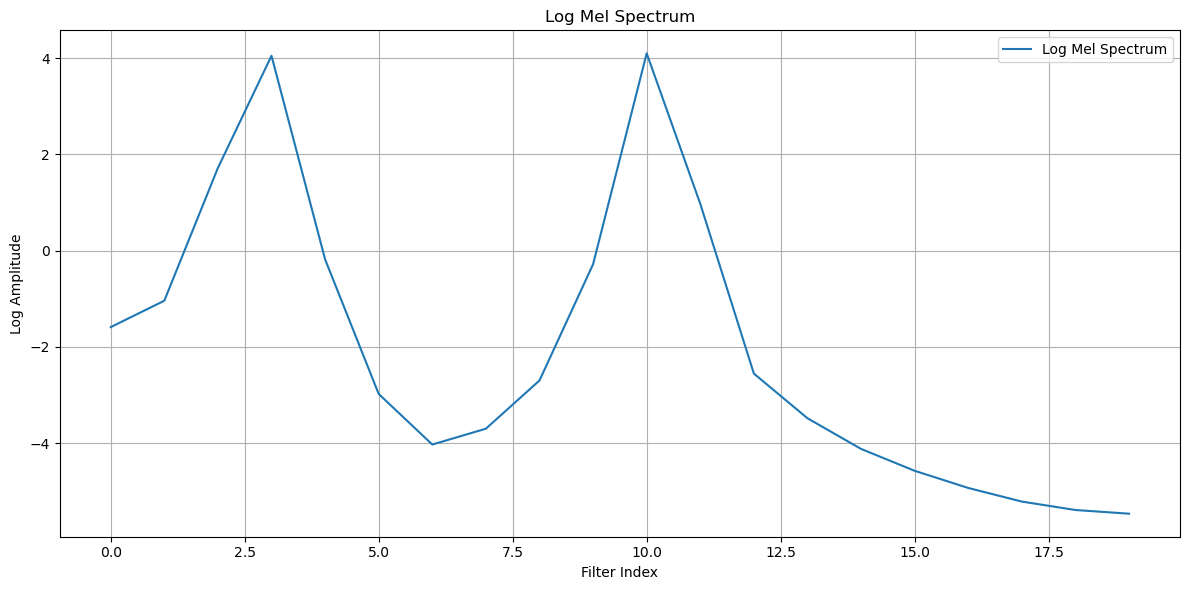

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.fftpack import fftfreq

# Parameters
fsample = 8000  # Sampling frequency in Hz
N = 1024        # Number of samples

# Generate a time-domain signal: a sum of two sinusoids
t = np.arange(N) / fsample
frequency1 = 300  # Frequency of the first sine wave in Hz
frequency2 = 1200 # Frequency of the second sine wave in Hz
x = 0.5 * np.sin(2 * np.pi * frequency1 * t) + 0.5 * np.sin(2 * np.pi * frequency2 * t)

# Compute the DFT of the signal
X = fft(x)
frequencies = fftfreq(N, d=1/fsample)

# Compute the Power Spectrum
power_spectrum = (np.abs(X) ** 2) / N

# Function to convert Hz to Mel
def hz_to_mel(hz):
    return 2595 * np.log10(1 + hz / 700)

# Function to convert Mel to Hz
def mel_to_hz(mel):
    return 700 * (10**(mel / 2595) - 1)

# Create Mel filter bank
def mel_filter_bank(n_filters, N, fsample):
    # Define the Mel scale
    mel_min = hz_to_mel(0)
    mel_max = hz_to_mel(fsample / 2)
    mel_points = np.linspace(mel_min, mel_max, n_filters + 2)
    hz_points = mel_to_hz(mel_points)
    bin_points = np.floor((N + 1) * hz_points / fsample).astype(int)
    
    # Create the filter bank
    filters = np.zeros((n_filters, N//2))
    for i in range(1, n_filters + 1):
        left = bin_points[i - 1]
        center = bin_points[i]
        right = bin_points[i + 1]
        
        for j in range(left, center):
            filters[i - 1, j] = (j - left) / (center - left)
        for j in range(center, right):
            filters[i - 1, j] = (right - j) / (right - center)
    
    return filters

# Number of Mel filters
n_filters = 20

# Generate the Mel filter bank
filters = mel_filter_bank(n_filters, N, fsample)

# Apply the filter bank to the power spectrum
mel_spectrum = np.dot(filters, power_spectrum[:N//2])

# Take the logarithm of the Mel spectrum
log_mel_spectrum = np.log(mel_spectrum + 1e-6)

# Plotting the Mel filter bank and Mel spectrum
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(t, x, label='Time-Domain Signal')
plt.title('Time-Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(frequencies[:N//2], 10 * np.log10(power_spectrum[:N//2]), label='Power Spectrum')
plt.title('Frequency-Domain Signal (Power Spectrum)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB/Hz)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
for i in range(n_filters):
    plt.plot(frequencies[:N//2], filters[i], label=f'Filter {i+1}')
plt.title('Mel Filter Bank')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Plotting the log Mel spectrum
plt.figure(figsize=(12, 6))
plt.plot(log_mel_spectrum, label='Log Mel Spectrum')
plt.title('Log Mel Spectrum')
plt.xlabel('Filter Index')
plt.ylabel('Log Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()